In [ ]:
import pandas as pd
import copy as cp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [ ]:
eso_dataset = pd.read_csv('Predictive Modelling - Data file.csv')

In [ ]:
print(eso_dataset.head(5))

   id order_date  ... suggested_order_quantity actual_order_quantity
0   1   1/2/2017  ...                        1                   1.0
1   2   1/2/2017  ...                        1                   1.0
2   3   1/2/2017  ...                        1                   2.0
3   4   1/2/2017  ...                        1                   1.0
4   5   1/2/2017  ...                        1                   1.0

[5 rows x 20 columns]


In [ ]:
eso_dataset.columns

Index(['id', 'order_date', 'order_day_of_week', 'store', 'supplier_id',
       'product_id', 'category', 'on_order_quantity', 'on_hand_quantity',
       'product_case_pack', 'retail_price', 'replenishment_unit_cost',
       'forecast_start_date', 'forecast_end_date', 'Ao_Forecast_Quantity',
       'Minimum_Order_Quantity', 'Maximum_Order_Quantity', 'lead_time',
       'suggested_order_quantity', 'actual_order_quantity'],
      dtype='object')

In [ ]:
print('china:', eso_dataset.order_day_of_week.unique())
print(eso_dataset.store.unique())

china: ['Monday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Tuesday' 'Sunday']
['s1' 's2']


In [ ]:
eso_dataset.store[0:5]

0    s1
1    s1
2    s1
3    s1
4    s1
Name: store, dtype: object

In [ ]:
store_data = cp.deepcopy(eso_dataset)

###Set the date fields

In [ ]:
store_data[['order_date', 'forecast_start_date', 'forecast_end_date']][0:5]

,order_date,forecast_start_date,forecast_end_date
0,1/2/2017,1/2/2017,1/8/2017
1,1/2/2017,1/2/2017,1/8/2017
2,1/2/2017,1/2/2017,1/8/2017
3,1/2/2017,1/2/2017,1/8/2017
4,1/2/2017,1/2/2017,1/8/2017


In [ ]:
store_data.order_date = pd.to_datetime(store_data.order_date)
store_data.forecast_start_date = pd.to_datetime(store_data.forecast_start_date)
store_data.forecast_end_date = pd.to_datetime(store_data.forecast_end_date)

In [ ]:
store_data[['order_date', 'forecast_start_date', 'forecast_end_date']][0:5]

,order_date,forecast_start_date,forecast_end_date
0,2017-01-02,2017-01-02,2017-01-08
1,2017-01-02,2017-01-02,2017-01-08
2,2017-01-02,2017-01-02,2017-01-08
3,2017-01-02,2017-01-02,2017-01-08
4,2017-01-02,2017-01-02,2017-01-08


Check if there are nulls:

In [ ]:
store_data.columns[store_data.isnull().any()].tolist()

[]

There are no NULLS in the dataframe

##Inspect category variables

In [ ]:

for index, column in enumerate(['order_day_of_week','store','supplier_id','category',]):
  # print(column)
  print(column,':   ',store_data[column].unique())

print('\n other variable is product_id, not printed here as the list is big')
print('total number of unique products:', len(pd.unique(store_data['product_id'])))

order_day_of_week :    ['Monday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Tuesday' 'Sunday']
store :    ['s1' 's2']
supplier_id :    [50 30 40 90 10 70 20 60]
category :    ['c654' 'c896' 'c762' 'c672' 'c773' 'c2052' 'c760' 'c786' 'c767' 'c770'
 'c771' 'c790' 'c781' 'c768' 'c793' 'c794' 'c791' 'c595' 'c901' 'c893'
 'c895' 'c902' 'c906' 'c646' 'c608' 'c900' 'c894' 'c1845' 'c1843' 'c658'
 'c650' 'c596' 'c649' 'c884' 'c662' 'c1844' 'c885' 'c636' 'c661' 'c597'
 'c602' 'c644' 'c891' 'c599' 'c656' 'c647' 'c605' 'c657' 'c607' 'c1037'
 'c801' 'c886' 'c766' 'c653' 'c645' 'c888' 'c1850' 'c603' 'c655' 'c889'
 'c601' 'c800' 'c904' 'c803' 'c805' 'c1101' 'c2056' 'c1102' 'c1045' 'c598'
 'c802' 'c1851' 'c761' 'c621' 'c785' 'c676' 'c986' 'c1106' 'c991' 'c609'
 'c1050' 'c1847' 'c985' 'c990' 'c637' 'c1094' 'c1096' 'c981' 'c1110'
 'c1026' 'c1027' 'c1052' 'c1053' 'c1217' 'c628' 'c764' 'c1552' 'c1566'
 'c1551' 'c1028' 'c1049' 'c1047' 'c1973' 'c1038' 'c669' 'c780' 'c626']

 other variable is product_id, n

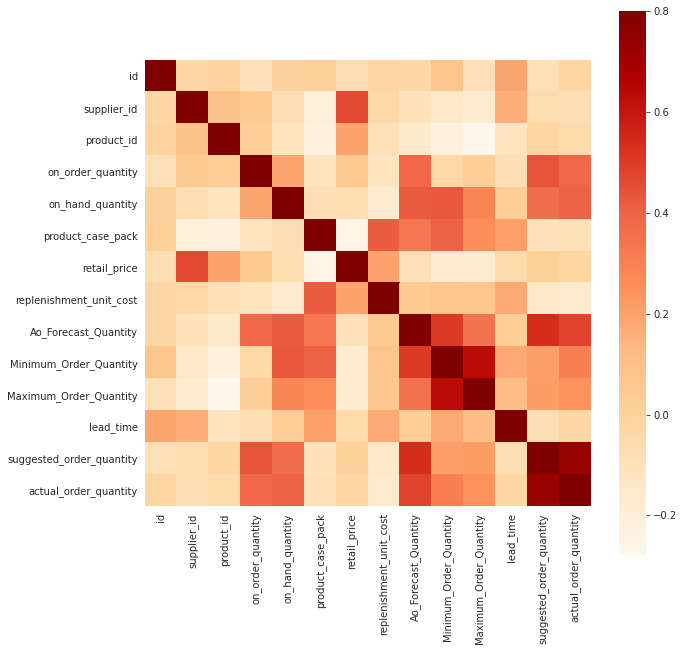

In [ ]:
matrix = store_data.corr() 
f, ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="OrRd");

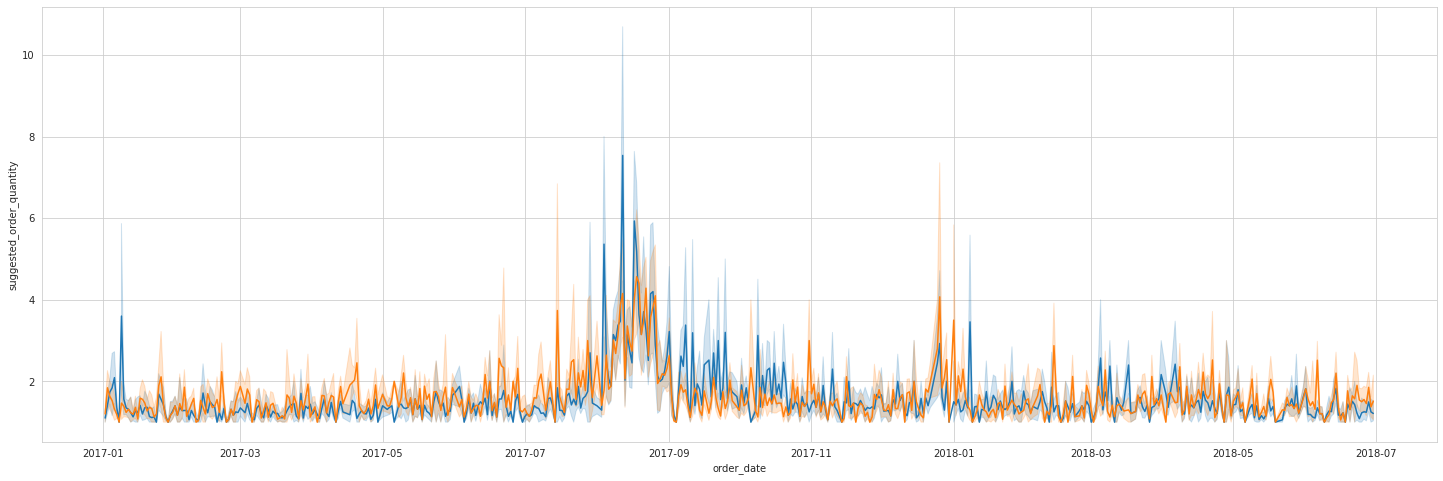

In [ ]:
# plt.figsize=(25,25)
# plt.plot(store_data['order_date'],store_data['suggested_order_quantity'],  marker='o')
# plt.plot(store_data['order_date'],store_data['actual_order_quantity'], marker='')

# plt.show()
plt.figure(figsize=(25,8))
sns.lineplot(data=store_data, x="order_date", y="suggested_order_quantity")
sns.lineplot(data=store_data, x="order_date", y="actual_order_quantity")

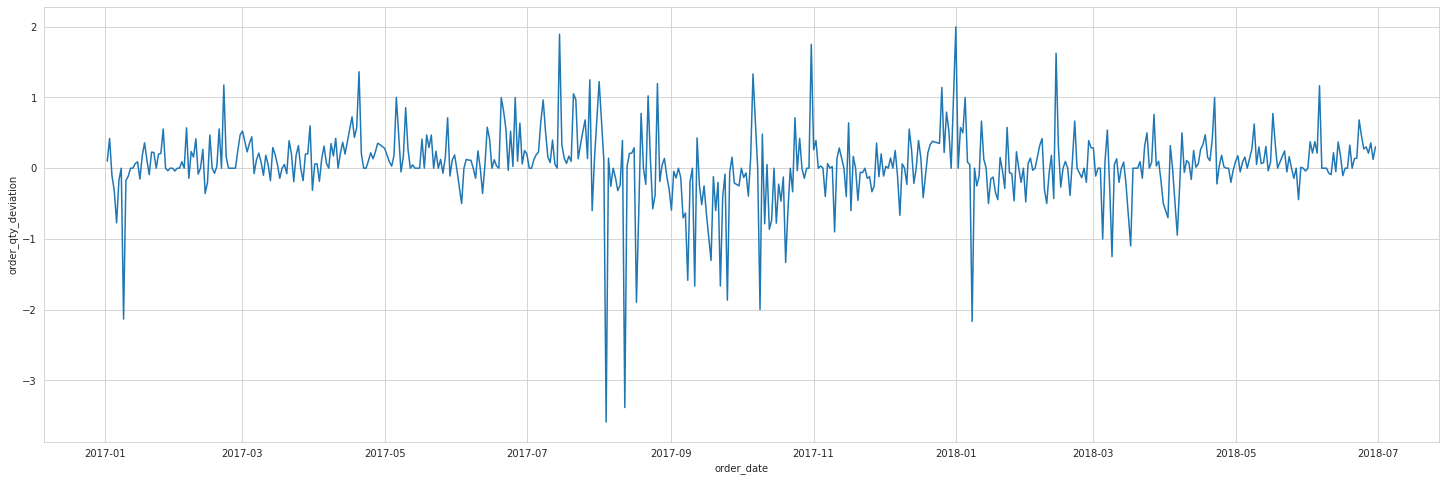

In [ ]:
store_data_visualize = pd.DataFrame()
plt.figure(figsize=(25,8))
sns.set_style('whitegrid')
store_data_visualize['order_qty_deviation'] = store_data['actual_order_quantity'] - store_data['suggested_order_quantity']
store_data_visualize['order_date'] = store_data['order_date']
sns.lineplot(data=store_data_visualize, x="order_date", y ='order_qty_deviation', ci=None)

Observation: Adjustments are on both sides. Amendments to order quantity is a frequent activity 

In [ ]:
def typeconversion(data):

  # change date fields to date_format_fields
  data.order_date = pd.to_datetime(data.order_date)
  data.forecast_start_date = pd.to_datetime(data.forecast_start_date)
  data.forecast_end_date = pd.to_datetime(data.forecast_end_date)
  data = data.astype({"order_day_of_week":'category',"store":'category',"supplier_id":'category',"category":'category', "product_id": 'category'})
  data = data.astype({"suggested_order_quantity": 'int', "actual_order_quantity": 'int', "Minimum_Order_Quantity": 'int', "Maximum_Order_Quantity":'int',
                      "on_order_quantity": 'int', "product_case_pack": 'int', "lead_time": 'int'})
  data = data.astype({"on_hand_quantity": 'float', "retail_price": 'float', "Ao_Forecast_Quantity": 'float',"replenishment_unit_cost": 'float'})
  data.info()
  return data

In [ ]:
  store_data = typeconversion(store_data)

In [ ]:
store_data.head(5)

,id,order_date,order_day_of_week,store,supplier_id,product_id,category,on_order_quantity,on_hand_quantity,product_case_pack,retail_price,replenishment_unit_cost,forecast_start_date,forecast_end_date,Ao_Forecast_Quantity,Minimum_Order_Quantity,Maximum_Order_Quantity,lead_time,suggested_order_quantity,actual_order_quantity
0,1,2017-01-02,Monday,s1,50,28483,c654,0,0.625000,16,2.60,18.56,2017-01-02,2017-01-08,8.50,2,48,2,1,1
1,2,2017-01-02,Monday,s1,50,40917,c896,0,0.125000,8,2.95,11.28,2017-01-02,2017-01-08,1.95,2,20,2,1,1
2,3,2017-01-02,Monday,s1,50,136366,c896,0,0.833333,6,2.50,4.76,2017-01-02,2017-01-08,0.80,5,40,2,1,2
3,4,2017-01-02,Monday,s1,50,136344,c762,0,0.375000,8,3.95,15.04,2017-01-02,2017-01-08,1.55,2,20,2,1,1
4,5,2017-01-02,Monday,s1,50,136078,c672,0,0.750000,4,2.80,4.56,2017-01-02,2017-01-08,1.15,2,12,2,1,1


In [ ]:
# Create final dataset
def createFinalDataSet(data):
  data['balance'] = data['on_hand_quantity'] + data['on_order_quantity']
  data.drop(['id', 'product_id','forecast_start_date', 'forecast_end_date', 'on_hand_quantity', 'on_order_quantity'], axis=1)
  return

In [ ]:
# Encoding for categorical features
def encoding_features(data):
    oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
    data['']


In [ ]:
store_data_dates = pd.DataFrame()
store_data_dates['forecast_duration'] = store_data['forecast_end_date'] - store_data['forecast_start_date']
# store_data_dates['forecast_duration'].unique()
# pd.unique(pd.Series([store_data_dates['forecast_duration']]))

store_data_dates.query("forecast_duration != '6'")

,forecast_duration
0,6 days
1,6 days
2,6 days
3,6 days
4,6 days
...,...
19663,6 days
19664,6 days
19665,6 days
19666,6 days
